# Linear Regression

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [180]:
plt.rcParams['figure.figsize']=[8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [181]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [183]:
col = df.columns.drop(['age','charges','bmi'])
for i in col:
    print(df[i].unique())

['female' 'male']
[0 1 3 2 5 4]
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [184]:
df.describe(include='all').fillna(0)

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,0.000000,2,0.000000,0.000000,2,4,0.000000
top,0.000000,male,0.000000,0.000000,no,southeast,0.000000
freq,0.000000,676,0.000000,0.000000,1064,364,0.000000
mean,39.207025,0,30.663397,1.094918,0,0,13270.422265
std,14.049960,0,6.098187,1.205493,0,0,12110.011237
min,18.000000,0,15.960000,0.000000,0,0,1121.873900
25%,27.000000,0,26.296250,0.000000,0,0,4740.287150
50%,39.000000,0,30.400000,1.000000,0,0,9382.033000
75%,51.000000,0,34.693750,2.000000,0,0,16639.912515


In [185]:
np.sum(df.isna())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [186]:
np.sum(df.isnull())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

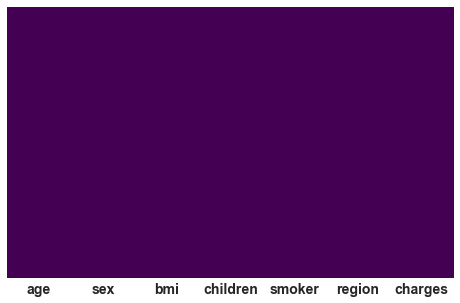

In [187]:
sns.heatmap(df.isna(),cmap='viridis',cbar=False,yticklabels=False)

<AxesSubplot:>

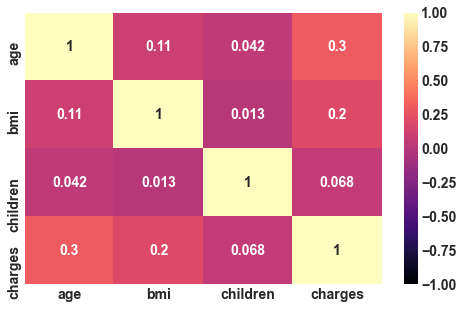

In [188]:
sns.heatmap(df.corr(),annot=True,cmap='magma',vmax=1,vmin=-1)

In [189]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='charges'>

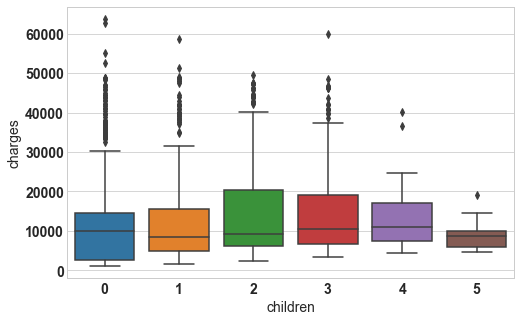

In [190]:
sns.boxplot('children','charges',data=df)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

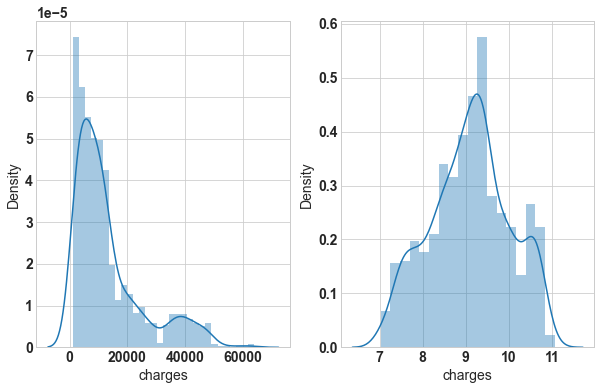

In [191]:
fig = plt.figure(figsize=(10,6))
ax=fig.add_subplot(121)
sns.distplot(df['charges'],hist=True,ax=ax)
ax2=fig.add_subplot(122)
sns.distplot(np.log(df['charges']),hist=True,ax=ax2)

<AxesSubplot:xlabel='sex', ylabel='charges'>

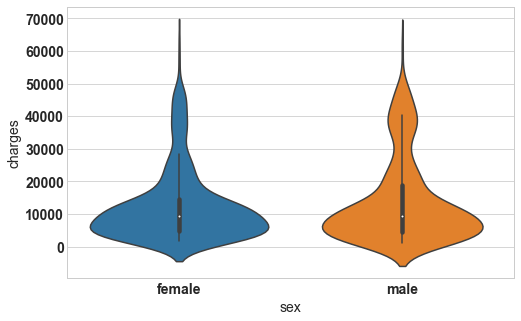

In [192]:
sns.violinplot(x='sex',y='charges',data=df)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

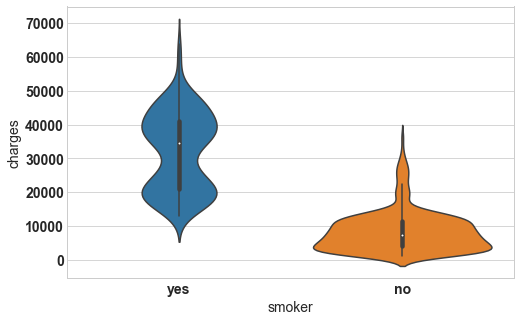

In [193]:
sns.violinplot(x='smoker',y='charges',data=df)

<AxesSubplot:xlabel='sex', ylabel='charges'>

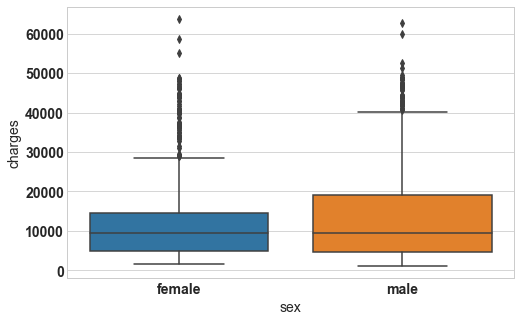

In [194]:
sns.boxplot(x='sex',y='charges',data=df)

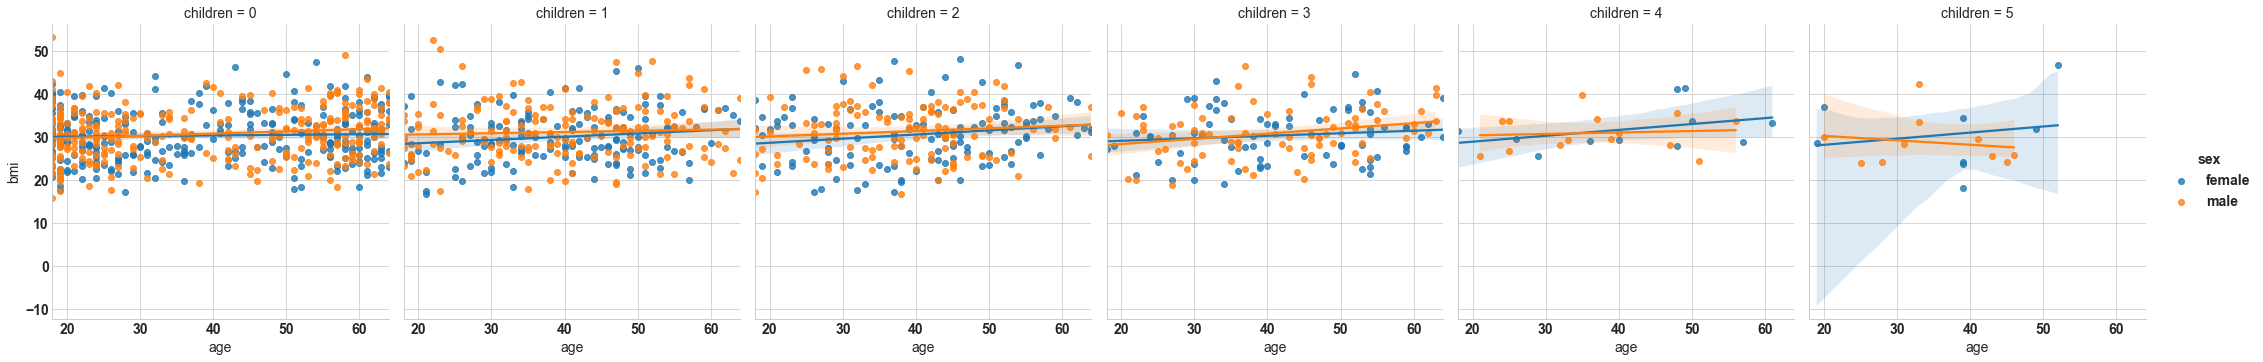

In [195]:
sns.lmplot(x='age',y='bmi',data=df,hue='sex',col='children')

In [196]:
from sklearn.preprocessing import OneHotEncoder
df_encode = df.copy()
enc = OneHotEncoder(drop='first')
encode = enc.fit_transform(df[['sex','children','smoker','region']]).toarray()
df_encode[enc.get_feature_names_out()]=encode



In [197]:
df_encode=df_encode.drop(['sex','children','smoker','region'],axis=1)

In [198]:
df_encode

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,18,33.770,1725.55230,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,4449.46200,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,21984.47061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,3866.85520,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,2205.98080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,18,36.850,1629.83350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,2007.94500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [199]:
df_encode['charges'] = np.log(df_encode['charges'])

In [200]:
X=df_encode.drop('charges',axis=1)
y = df_encode['charges']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [201]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)
yhat_lr1 = lr1.predict(X_test)
score_lr1 = lr1.score(X_test,y_test)

In [202]:
score_lr1

0.779568754505532

In [203]:
coeff = np.concatenate(([lr1.intercept_],lr1.coef_),axis=0)
parameter = np.concatenate((['intercept'],X.columns),axis=0)
coefficient = pd.DataFrame(coeff,index=parameter,columns=['parameters'])
coefficient

,parameters
intercept,7.059171
age,0.033134
bmi,0.013517
sex_male,-0.067767
children_1,0.149457
children_2,0.272919
children_3,0.244095
children_4,0.523339
children_5,0.466030
smoker_yes,1.550481


In [204]:
np.shape(np.array('intercept'))

()

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


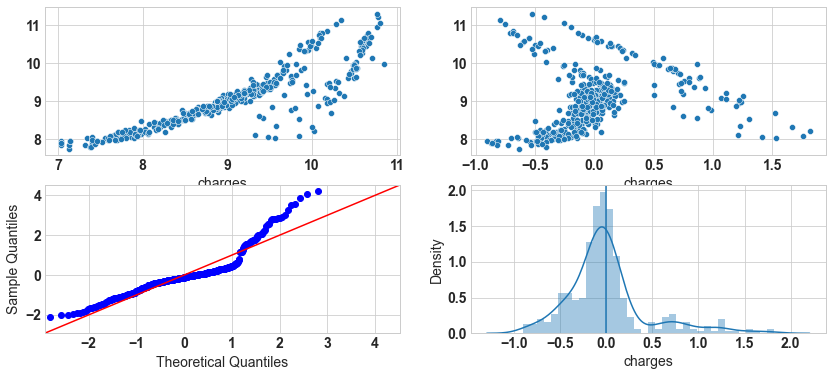

In [205]:
import statsmodels.api as sm

f,ax = plt.subplots(2,2,figsize=(14,6))
sns.scatterplot(x=y_test,y=yhat_lr1,ax=ax[0][0]);
sns.scatterplot(y_test-yhat_lr1,yhat_lr1,ax=ax[0][1]);
sm.qqplot(y_test-yhat_lr1,fit=True,line='45',ax=ax[1][0]);
sns.distplot(y_test -yhat_lr1,ax=ax[1][1])
ax[1][1].axvline((y_test-yhat_lr1).mean())
plt.show()

In [206]:
import statsmodels.stats.api as ssa
test = ssa.het_goldfeldquandt((y_test-yhat_lr1),X_test)
test

(0.9487651334202029, 0.6411890103491087, 'increasing')

In [207]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

,feature,VIF
0,age,7.737717
1,bmi,11.560526
2,sex_male,2.005057
3,children_1,1.537420
4,children_2,1.411175
5,children_3,1.278255
6,children_4,1.044623
7,children_5,1.034276
8,smoker_yes,1.268164
9,region_northwest,1.896183


In [228]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
Input = [('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(X_train,y_train)
yhat_pipe = pipe.predict(X_test)
r2_score = pipe.score(X_test,y_test)
print(r2_score)

0.8502039452788263


C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


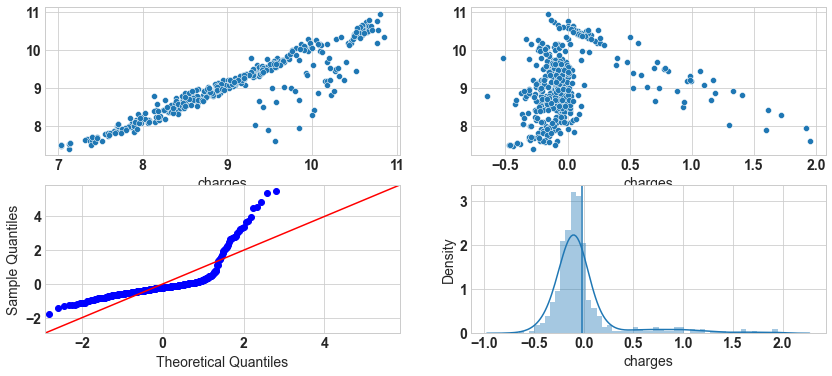

In [229]:
f,ax = plt.subplots(2,2,figsize=(14,6))
sns.scatterplot(x=y_test,y=yhat_pipe,ax=ax[0][0]);
sns.scatterplot(y_test-yhat_pipe,yhat_pipe,ax=ax[0][1]);
sm.qqplot(y_test-yhat_pipe,fit=True,line='45',ax=ax[1][0]);
sns.distplot(y_test -yhat_pipe,ax=ax[1][1])
ax[1][1].axvline((y_test-yhat_pipe).mean())
plt.show()

In [210]:
from sklearn.linear_model import RidgeCV
ridge=RidgeCV(alphas=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,40,50,60],cv=5)
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
alpha

0.2

In [155]:
ridge=RidgeCV(alphas=[alpha*0.1,alpha*0.2,alpha*0.3,alpha*0.4,alpha*0.5,alpha*0.8,alpha*0.9],cv=5)
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
alpha

0.18000000000000002

In [156]:
from sklearn.linear_model import Ridge
lr_ridge = Ridge(alpha=alpha)
lr_ridge.fit(X_train,y_train)
y_hat = lr_ridge.predict(X_test)
lr_ridge.score(X_test,y_test)

0.7795725827597523

In [236]:
ridge=RidgeCV(alphas=[1,2,2.5,3,3.5,4,5,6,7,8,9,10,20,30,40,50,60],cv=2)
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
alpha

1.0

In [237]:
ridge=RidgeCV(alphas=[alpha*0.1,alpha*0.2,alpha*0.3,alpha*0.4,alpha*0.5,alpha*0.8,alpha*0.9,
                      alpha*1.1,alpha*1.2,alpha*1.3,alpha*1.4,alpha*1.5,alpha*1.6,alpha*1.7,alpha*1.8,
                     alpha*1.9,alpha*2,alpha*2.1,alpha*2.2,alpha*2.3,alpha*2.4,alpha*2.5,alpha*2.6],cv=2)
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
alpha

0.8

In [238]:
lr_ridge = Ridge(alpha=alpha)
lr_ridge.fit(X_train,y_train)
y_hat = lr_ridge.predict(X_test)
lr_ridge.score(X_test,y_test)

0.7795482391794945